In [8]:
import matplotlib.pyplot as plt
import numpy as np
from math import *
from pylab import *

### Problem 1 - Comet orbits

Alternative **a)** Turn this two equations in four of first order:

$$ f(x) = \frac{dx}{dt} = v_{x} \hspace{1cm} \rightarrow \hspace{1cm} f(v_{x}) = \frac{dv_{x}}{dt} = -GM \frac{x}{r^{3}} $$

where $\hspace{1cm} r = \sqrt{x^{2} + y^{2}} \hspace{1cm}$ using the same analogy to y:

$$ f(y) = \frac{dy}{dt} = v_{y} \hspace{1cm} \rightarrow \hspace{1cm} f(v_{y}) = \frac{dv_{y}}{dt} = -GM \frac{y}{r^{3}} $$

Alternative **b)** Solve the equations and plot the trajetory of the comet:

In [9]:
def func1(r_array, t):
  G = 6.67e-11
  M = 1.98898e30

  x, y = r_array[0], r_array[1]
  vx, vy = r_array[2], r_array[3]

  r = sqrt(x**2 + y**2)

  fx = vx
  fy = vy

  fvx = -(G*M/r**3)*x
  fvy = -(G*M/r**3)*y

  return array([fx, fy, fvx, fvy], float)

def rouge_kutta_10_1(tpoints, r1, func_name):

  x_points, vx_points = [], []
  y_points, vy_points = [], []

  for t in tpoints:
    x_points.append(r1[0])
    y_points.append(r1[1])

    vx_points.append(r1[2])
    vy_points.append(r1[3])

    k1 = h*func_name(r1, t)
    k2 = h*func_name(r1+0.5*k1, t+0.5*h)
    k3 = h*func_name(r1+0.5*k2, t+0.5*h)
    k4 = h*func_name(r1+k3, t+h)

    r1 += (k1+2*k2+2*k3+k4)/6

  return x_points, y_points, vx_points, vy_points

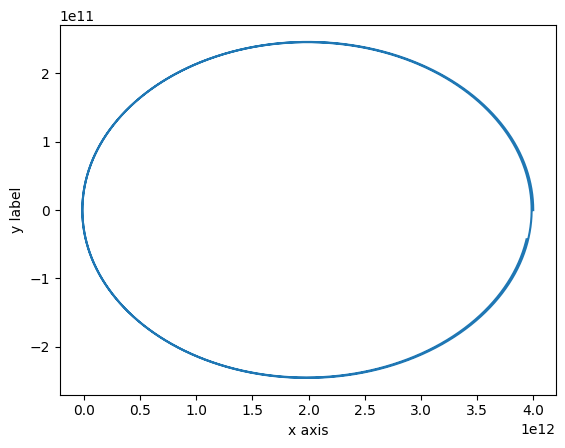

In [104]:
a = 0
b = 3*1e9
N = 1e5
h = (b-a)/N
tpoints = arange(a, b, h)

r1 = array([4e12, 0, 0, 500], float)

x, y, vx, vy = rouge_kutta_10_1(tpoints, r1, func1)

xlabel('x axis')
ylabel('y label')
plot(x, y)
show()

### Problem 2 - EDO solution

Solve the differential equation below using the **leapfrog** method:

$$ \frac{d^{2}x}{dt^{2}} = \left(\frac{dx}{dt}\right)^{2} - x - 5$$

In [33]:
def func2(r, t):

  x, v = r[0], r[1]

  fx = v
  fvx = v**2 -x -5
  return array([fx, fvx], float)

def leapfrog_10_2(tpoints, r1, func_name):
    x_points = []
    vx_points = []

    v_half = r1[0] + 0.5 * h * func_name(r1, tpoints[0])[0]

    for t in tpoints:
        x_points.append(r1[0])
        vx_points.append(r1[1])

        r1[0] += h * v_half
        accel = func_name(r1, t + h)[1]
        v_half += h * accel

    return x_points, vx_points

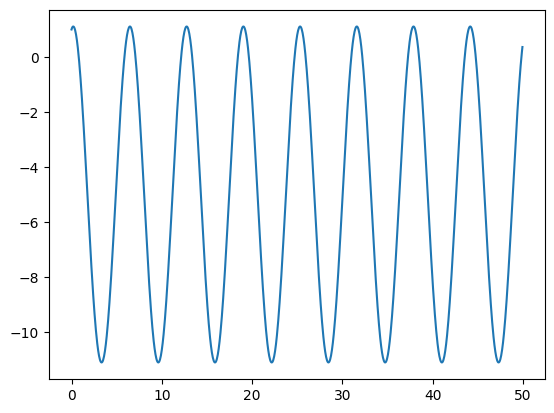

In [34]:
a = 0
b = 50

N = 1000
h = (b-a)/N

tpoints = arange(a, b, h)

r2 = array([1, 0], float)

x, vx = leapfrog_10_2(tpoints, r2, func2)

plot(tpoints, x)
show()